In [1]:
from src.preprocessing import *
import numpy as np
import pandas as pd

In [4]:
files = get_raw_file_paths('off_data_testing/pickle_df')

# Load one dataframe
df = pd.read_pickle(files[0])

In [8]:
subjects = 6
sessions = 2
       
trials = [[[[], [], []]for _ in range(sessions)] for _ in range(subjects)]

for file in files:
    subject = int(file.split('/')[-1][8]) - 1
    session = int(file.split('/')[-1][11]) - 1
    recordings = process_recording(file)

    for recording in recordings:
        if recording[1] == 0:
            trials[subject][session][0].append(recording[0])
        elif recording[1] == 1:
            trials[subject][session][1].append(recording[0])
        elif recording[1] == 2:
            trials[subject][session][2].append(recording[0])

In [12]:
mean_trials = []

for i, subject in enumerate(trials):
    mean_trials.append([])
    for session in subject:
        mean_trials[i].append((
            np.mean(np.array(session[0]), axis=0),
            np.mean(np.array(session[1]), axis=0),
            np.mean(np.array(session[2]), axis=0)
        ))

In [21]:
print(mean_trials[0][0][0].shape)
print(np.mean(mean_trials[0][0][0], axis=0))

(64, 308)
[ 2.49598697e-01  2.36335173e-01  2.20638171e-01  2.03093991e-01
  1.85049027e-01  1.67133629e-01  1.49229974e-01  1.31473258e-01
  1.14301324e-01  9.83225703e-02  8.44151601e-02  7.31503814e-02
  6.41835332e-02  5.66929057e-02  5.03077433e-02  4.50874567e-02
  4.10957038e-02  3.87688503e-02  3.84787358e-02  3.97481844e-02
  4.20837440e-02  4.51852754e-02  4.77059931e-02  4.79589701e-02
  4.59439903e-02  4.27597649e-02  3.92752178e-02  3.61683220e-02
  3.36963795e-02  3.14629264e-02  2.87529863e-02  2.51703076e-02
  2.07054652e-02  1.56555343e-02  1.09172985e-02  7.00586289e-03
  3.97378718e-03  2.68908683e-03  3.79460165e-03  6.11641863e-03
  7.30631594e-03  5.63683175e-03  4.71145962e-04 -8.56560562e-03
 -2.09334809e-02 -3.52009684e-02 -5.14337122e-02 -7.05382600e-02
 -9.17623043e-02 -1.14270538e-01 -1.38206527e-01 -1.62861004e-01
 -1.87115073e-01 -2.10575625e-01 -2.32862920e-01 -2.53224850e-01
 -2.71489561e-01 -2.88473904e-01 -3.04600805e-01 -3.19636881e-01
 -3.33968014e-0

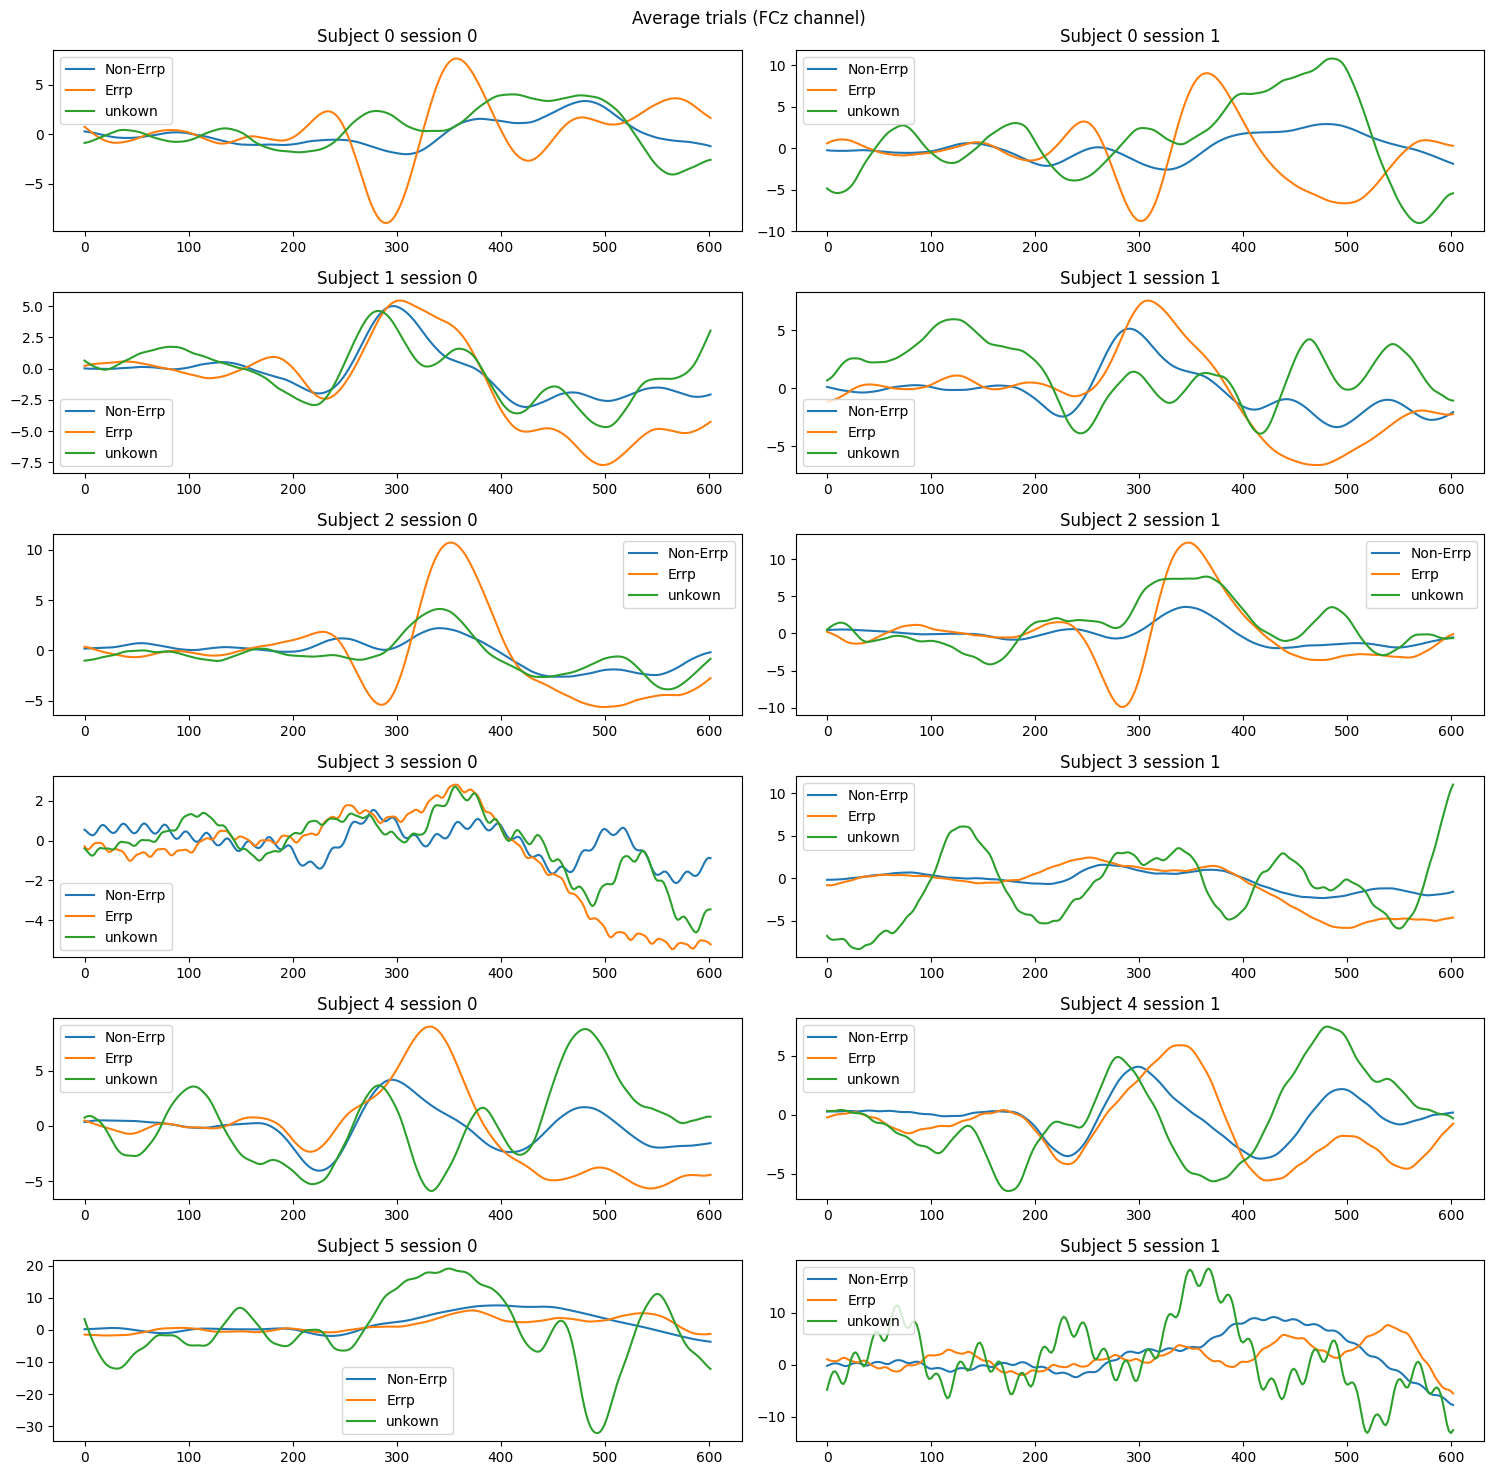

In [22]:
import matplotlib.pyplot as plt

fcz_idx = df.columns.get_loc('FCz')

fcz_len = len(mean_trials[0][0][0][fcz_idx])

duration = fcz_len / 512 * 1000
t = np.linspace(0, duration, fcz_len)

figure, axes = plt.subplots(subjects, sessions, figsize=(15, 15))


for i, subject in enumerate(mean_trials):
    for j, session in enumerate(subject):
        fcz_0 = session[0][fcz_idx]
        fcz_1 = session[1][fcz_idx]
        fcz_2 = session[2][fcz_idx]

        axes[i, j].plot(t, fcz_0, label='Non-Errp')
        axes[i, j].plot(t, fcz_1, label='Errp')
        axes[i, j].plot(t, fcz_2, label='unkown')
        axes[i, j].set_title('Subject {subject} session {session}'.format(subject=i, session=j))
        axes[i, j].legend()

figure.suptitle("Average trials (FCz channel)")       
figure.tight_layout()

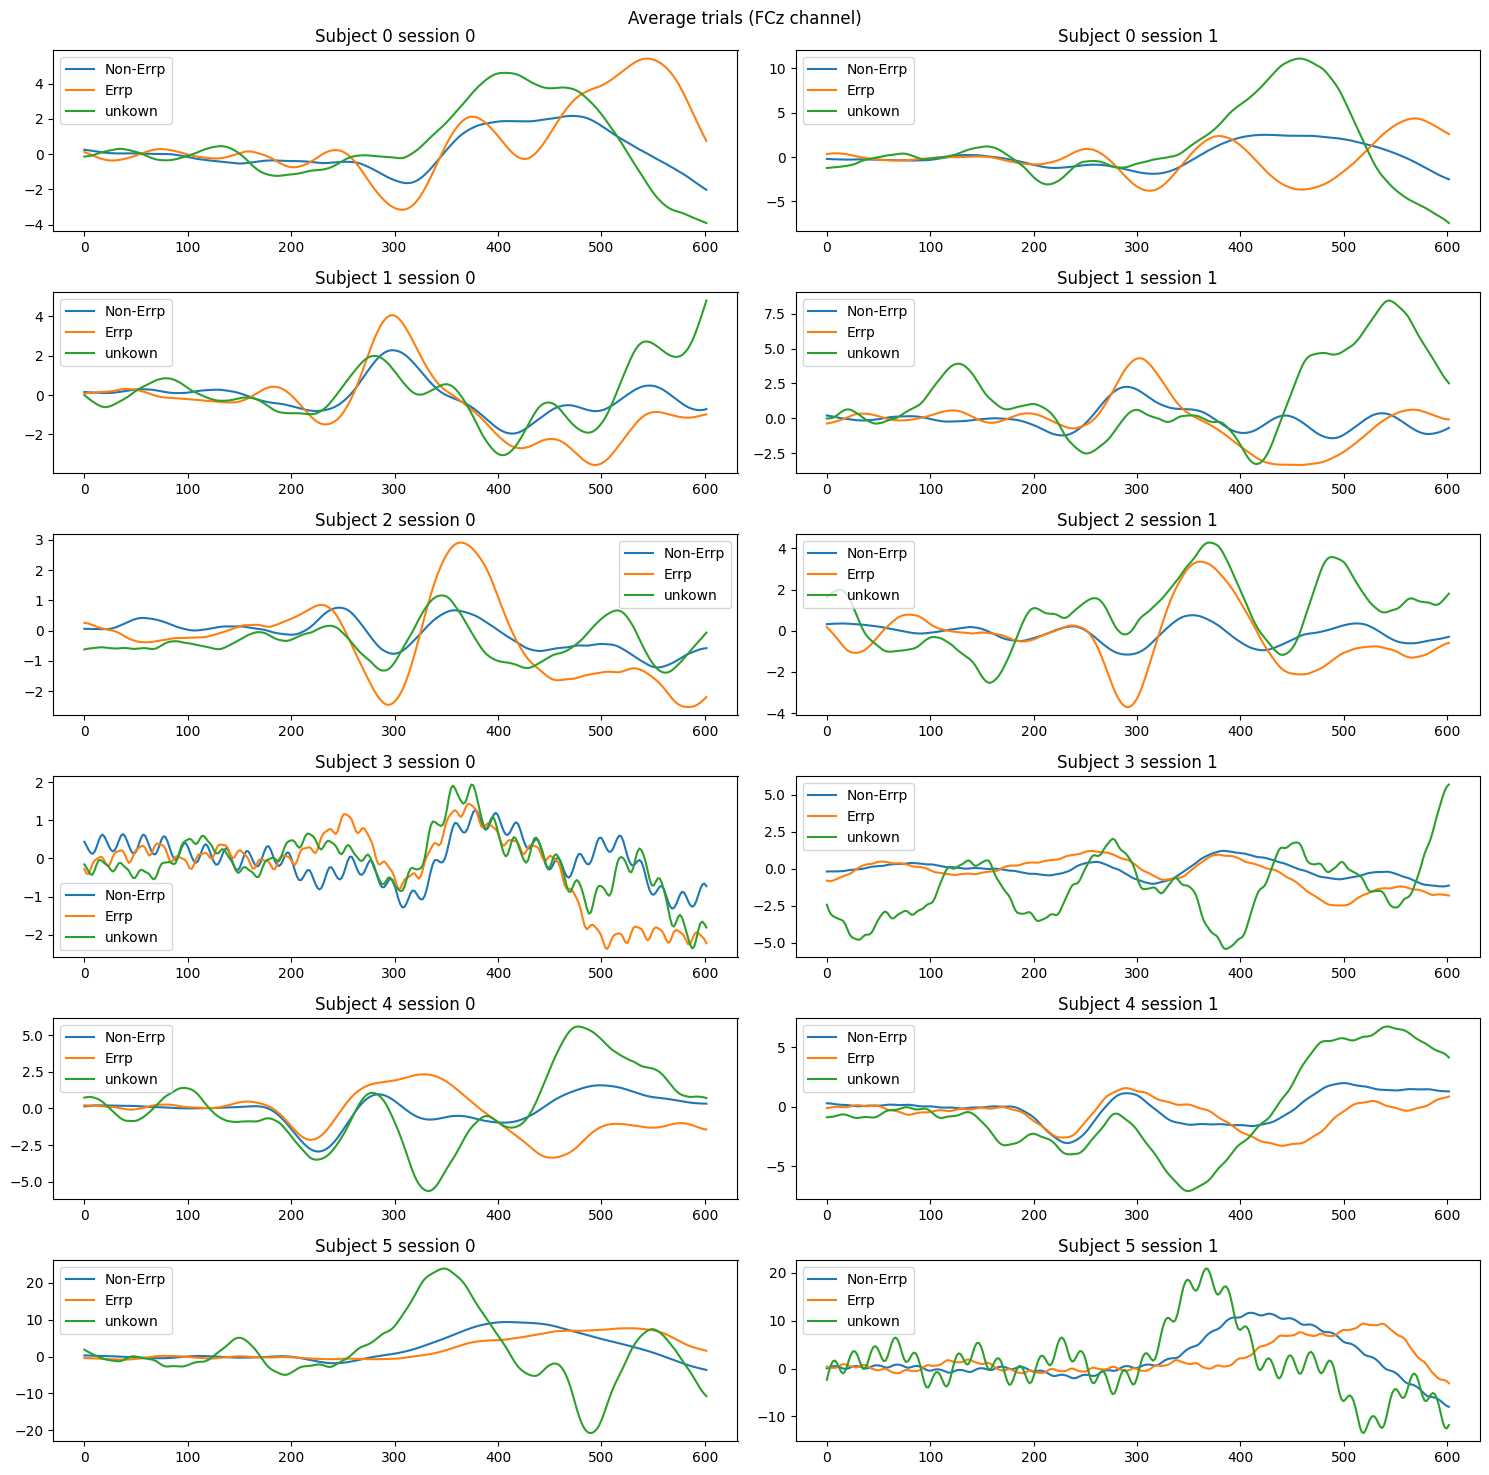

In [23]:
figure, axes = plt.subplots(subjects, sessions, figsize=(15, 15))


for i, subject in enumerate(mean_trials):
    for j, session in enumerate(subject):
        signal_0 = np.mean(session[0], axis=0)
        signal_1 = np.mean(session[1], axis=0)
        signal_2 = np.mean(session[2], axis=0)

        axes[i, j].plot(t, signal_0, label='Non-Errp')
        axes[i, j].plot(t, signal_1, label='Errp')
        axes[i, j].plot(t, signal_2, label='unkown')
        axes[i, j].set_title('Subject {subject} session {session}'.format(subject=i, session=j))
        axes[i, j].legend()

figure.suptitle("Average trials (average of all channels)")       
figure.tight_layout()